In [42]:
from sys import path
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse, mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Adding KELMOR.py to the path
path.append("KELMOR.py") # Replace . by the folder that contains KELMOR.py

# Import KELMOR module and class
kelmor_module = __import__("KELMOR") 
KELMOR = kelmor_module.KELMOR

# Load the dataset
DKI1 = pd.read_excel("DATA_Normalization.xlsx", sheet_name="DKI1")
X = DKI1.index.values.reshape(-1, 1)
y = DKI1['PM10'].values.reshape(-1,)

## Laplacian Kernel

In [43]:
# Perform K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True)

mse_scores = []
mae_scores = []
r2_scores = []

for train_inds, test_inds in kfold.split(X, y):
    X_train, y_train = X[train_inds, :], y[train_inds]
    X_test, y_test = X[test_inds, :], y[test_inds]
    
    # Train KELMOR on the dataset
    gamma_value = 0.01
    kelmor = KELMOR(C=10, kernel="laplacian", gamma=gamma_value)
    kelmor.fit(X_train, y_train)

    # Make predictions
    y_pred = kelmor.predict(X_test)

    # Calculate mean squared error of the predictions
    mse_score = mse(y_test, y_pred)
    mse_scores.append(mse_score)

    # Calculate mean absolute error
    mae_score = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae_score)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


# Mean of MSE scores from cross validation
mean_mse = np.mean(mse_scores)

# Mean of MAE scores from cross-validation
mean_mae = np.mean(mae_scores)

# Mean of R-squared scores from cross-validation
mean_r2 = np.mean(r2_scores)

# Calculate root mean square error from mean squared error
rmse_score = np.sqrt(mean_mse)

print("\nEvaluation Metrics:")
print("RMSE:", rmse_score)
print("MSE:", mean_mse)
print("MAE:", mean_mae)
print("R-squared:", mean_r2)


Evaluation Metrics:
RMSE: 0.119491862774225
MSE: 0.014278305269254218
MAE: 0.08879114219898446
R-squared: 0.5017107913285763


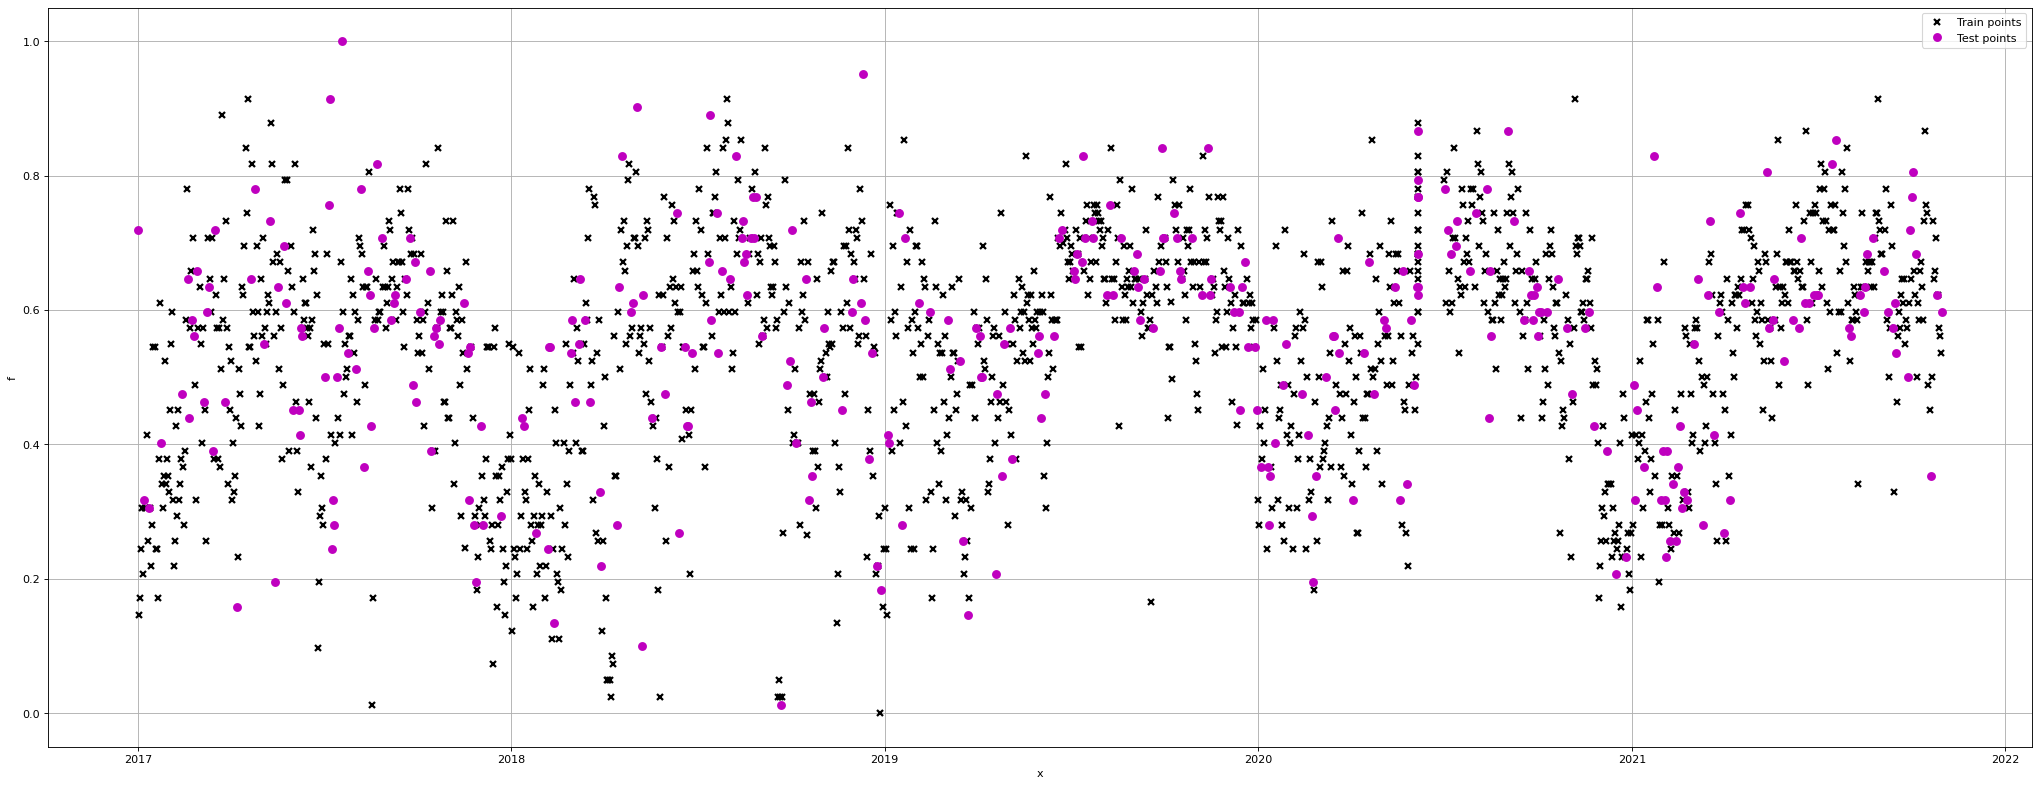

In [44]:
import matplotlib.pyplot as plt
# Plot observations
plt.figure(figsize=(32, 12), dpi=80)
plt.plot(np.array(DKI1['Tanggal'].loc[X_train.flatten()]).reshape(-1,1), y_train, "kx", mew=2, label='Train points')
plt.plot(np.array(DKI1['Tanggal'].loc[X_test.flatten()]).reshape(-1,1), y_test, "mo", mew=2, label='Test points')

# Annotate plot
plt.xlabel("x"), plt.ylabel("f")
plt.grid()
plt.legend()

## RBF Kernel

In [45]:
# Perform K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True)

mse_scores = []
mae_scores = []
r2_scores = []

for train_inds, test_inds in kfold.split(X, y):
    X_train, y_train = X[train_inds, :], y[train_inds]
    X_test, y_test = X[test_inds, :], y[test_inds]
    
    # Train KELMOR on the dataset
    gamma_value = 0.01
    kelmor = KELMOR(C=10, kernel="rbf", gamma=gamma_value)
    kelmor.fit(X_train, y_train)

    # Make predictions
    y_pred = kelmor.predict(X_test)

    # Calculate mean squared error of the predictions
    mse_score = mse(y_test, y_pred)
    mse_scores.append(mse_score)

    # Calculate mean absolute error
    mae_score = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae_score)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


# Mean of MSE scores from cross validation
mean_mse = np.mean(mse_scores)

# Mean of MAE scores from cross-validation
mean_mae = np.mean(mae_scores)

# Mean of R-squared scores from cross-validation
mean_r2 = np.mean(r2_scores)

# Calculate root mean square error from mean squared error
rmse_score = np.sqrt(mean_mse)

print("\nEvaluation Metrics:")
print("RMSE:", rmse_score)
print("MSE:", mean_mse)
print("MAE:", mean_mae)
print("R-squared:", mean_r2)


Evaluation Metrics:
RMSE: 0.1243985719946191
MSE: 0.01547500471430043
MAE: 0.09279620032621597
R-squared: 0.45855732909709346


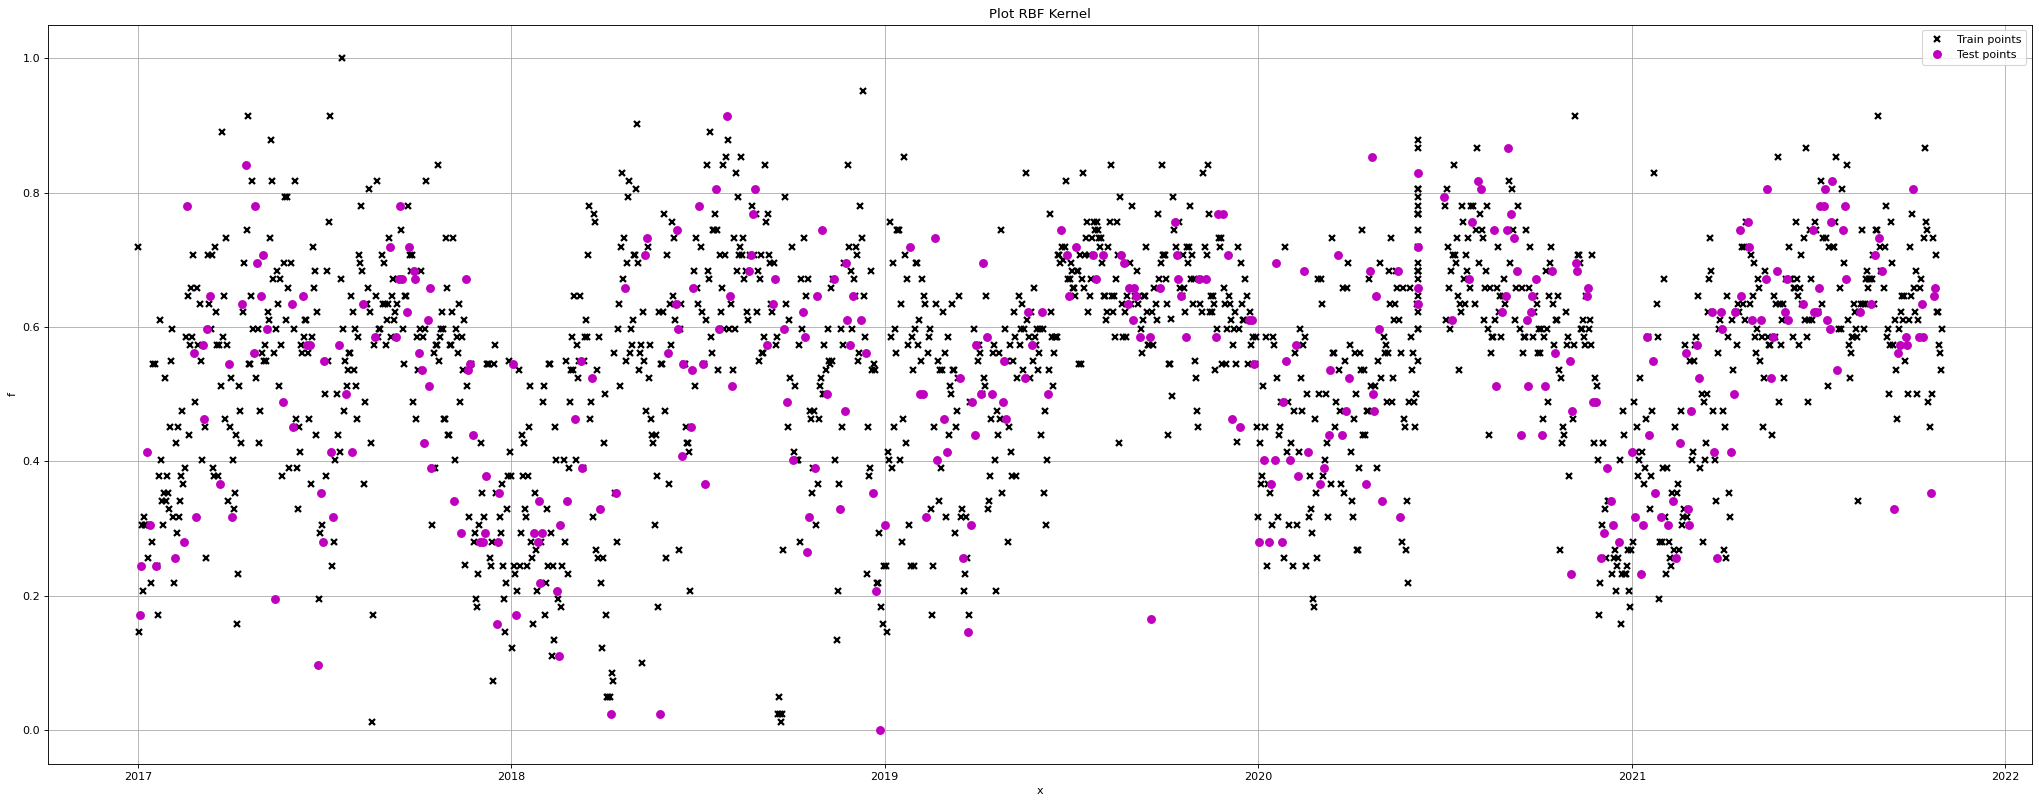

In [46]:
import matplotlib.pyplot as plt
# Plot observations
plt.figure(figsize=(32, 12), dpi=80)
plt.plot(np.array(DKI1['Tanggal'].loc[X_train.flatten()]).reshape(-1,1), y_train, "kx", mew=2, label='Train points')
plt.plot(np.array(DKI1['Tanggal'].loc[X_test.flatten()]).reshape(-1,1), y_test, "mo", mew=2, label='Test points')

# Annotate plot
plt.title('Plot RBF Kernel')
plt.xlabel("x"), plt.ylabel("f")
plt.grid()
plt.legend()

## Linear Kernel

In [47]:
# Perform K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True)

mse_scores = []
mae_scores = []
r2_scores = []

for train_inds, test_inds in kfold.split(X, y):
    X_train, y_train = X[train_inds, :], y[train_inds]
    X_test, y_test = X[test_inds, :], y[test_inds]
    
    # Train KELMOR on the dataset
    gamma_value = 0.01
    kelmor = KELMOR(C=10, kernel="linear", gamma=gamma_value)
    kelmor.fit(X_train, y_train)

    # Make predictions
    y_pred = kelmor.predict(X_test)

    # Calculate mean squared error of the predictions
    mse_score = mse(y_test, y_pred)
    mse_scores.append(mse_score)

    # Calculate mean absolute error
    mae_score = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae_score)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


# Mean of MSE scores from cross validation
mean_mse = np.mean(mse_scores)

# Mean of MAE scores from cross-validation
mean_mae = np.mean(mae_scores)

# Mean of R-squared scores from cross-validation
mean_r2 = np.mean(r2_scores)

# Calculate root mean square error from mean squared error
rmse_score = np.sqrt(mean_mse)

print("\nEvaluation Metrics:")
print("RMSE:", rmse_score)
print("MSE:", mean_mse)
print("MAE:", mean_mae)
print("R-squared:", mean_r2)


Evaluation Metrics:
RMSE: 0.17238971233577804
MSE: 0.029718212919212304
MAE: 0.13712030251445334
R-squared: -0.04383968720399269


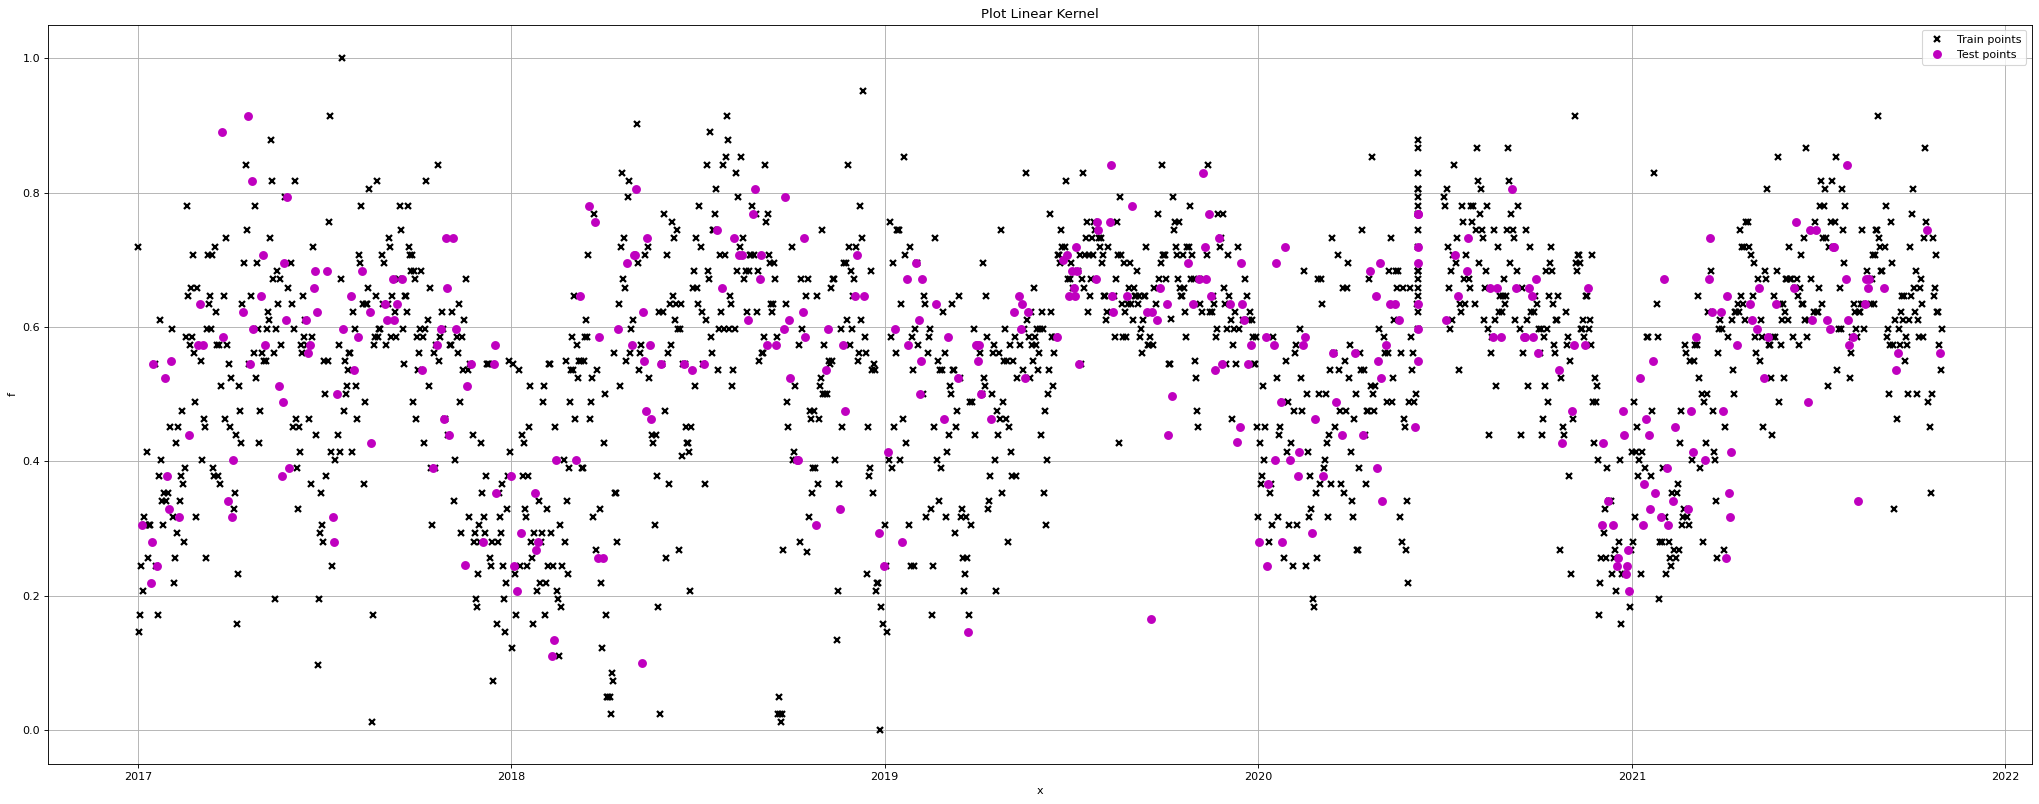

In [48]:
import matplotlib.pyplot as plt
# Plot observations
plt.figure(figsize=(32, 12), dpi=80)
plt.plot(np.array(DKI1['Tanggal'].loc[X_train.flatten()]).reshape(-1,1), y_train, "kx", mew=2, label='Train points')
plt.plot(np.array(DKI1['Tanggal'].loc[X_test.flatten()]).reshape(-1,1), y_test, "mo", mew=2, label='Test points')

# Annotate plot
plt.title('Plot Linear Kernel')
plt.xlabel("x"), plt.ylabel("f")
plt.grid()
plt.legend()

## Sigmoid Kernel

In [49]:
# Perform K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True)

mse_scores = []
mae_scores = []
r2_scores = []

for train_inds, test_inds in kfold.split(X, y):
    X_train, y_train = X[train_inds, :], y[train_inds]
    X_test, y_test = X[test_inds, :], y[test_inds]
    
    # Train KELMOR on the dataset
    gamma_value = 0.01
    kelmor = KELMOR(C=10, kernel="sigmoid", gamma=gamma_value)
    kelmor.fit(X_train, y_train)

    # Make predictions
    y_pred = kelmor.predict(X_test)

    # Calculate mean squared error of the predictions
    mse_score = mse(y_test, y_pred)
    mse_scores.append(mse_score)

    # Calculate mean absolute error
    mae_score = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae_score)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


# Mean of MSE scores from cross validation
mean_mse = np.mean(mse_scores)

# Mean of MAE scores from cross-validation
mean_mae = np.mean(mae_scores)

# Mean of R-squared scores from cross-validation
mean_r2 = np.mean(r2_scores)

# Calculate root mean square error from mean squared error
rmse_score = np.sqrt(mean_mse)

print("\nEvaluation Metrics:")
print("RMSE:", rmse_score)
print("MSE:", mean_mse)
print("MAE:", mean_mae)
print("R-squared:", mean_r2)


Evaluation Metrics:
RMSE: 0.17142003255106486
MSE: 0.029384827559808136
MAE: 0.1304418963954317
R-squared: -0.024456108699034695


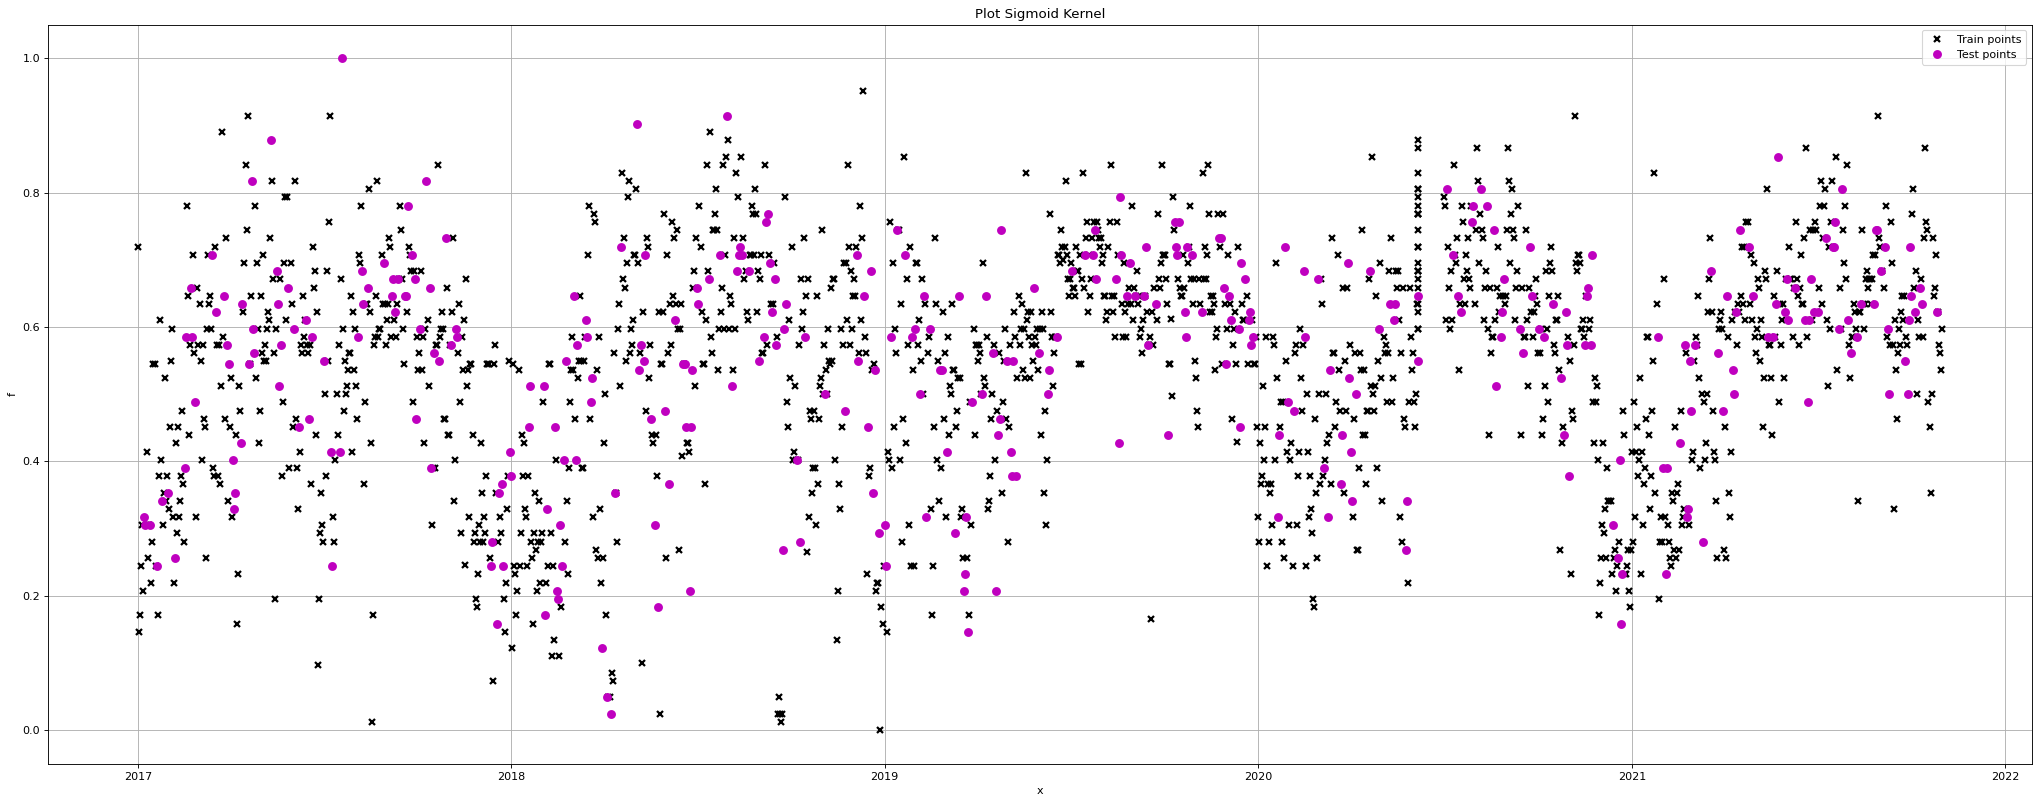

In [50]:
import matplotlib.pyplot as plt
# Plot observations
plt.figure(figsize=(32, 12), dpi=80)
plt.plot(np.array(DKI1['Tanggal'].loc[X_train.flatten()]).reshape(-1,1), y_train, "kx", mew=2, label='Train points')
plt.plot(np.array(DKI1['Tanggal'].loc[X_test.flatten()]).reshape(-1,1), y_test, "mo", mew=2, label='Test points')

# Annotate plot
plt.title('Plot Sigmoid Kernel')
plt.xlabel("x"), plt.ylabel("f")
plt.grid()
plt.legend()

## Cosine Kernel

In [51]:
# Perform K-Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True)

mse_scores = []
mae_scores = []
r2_scores = []

for train_inds, test_inds in kfold.split(X, y):
    X_train, y_train = X[train_inds, :], y[train_inds]
    X_test, y_test = X[test_inds, :], y[test_inds]
    
    # Train KELMOR on the dataset
    gamma_value = 0.01
    kelmor = KELMOR(C=10, kernel="cosine", gamma=gamma_value)
    kelmor.fit(X_train, y_train)

    # Make predictions
    y_pred = kelmor.predict(X_test)

    # Calculate mean squared error of the predictions
    mse_score = mse(y_test, y_pred)
    mse_scores.append(mse_score)

    # Calculate mean absolute error
    mae_score = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae_score)

    # Calculate R-squared score
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)


# Mean of MSE scores from cross validation
mean_mse = np.mean(mse_scores)

# Mean of MAE scores from cross-validation
mean_mae = np.mean(mae_scores)

# Mean of R-squared scores from cross-validation
mean_r2 = np.mean(r2_scores)

# Calculate root mean square error from mean squared error
rmse_score = np.sqrt(mean_mse)

print("\nEvaluation Metrics:")
print("RMSE:", rmse_score)
print("MSE:", mean_mse)
print("MAE:", mean_mae)
print("R-squared:", mean_r2)


Evaluation Metrics:
RMSE: 0.17264063207793692
MSE: 0.02980478784426958
MAE: 0.13287619459954927
R-squared: -0.0413608533981968


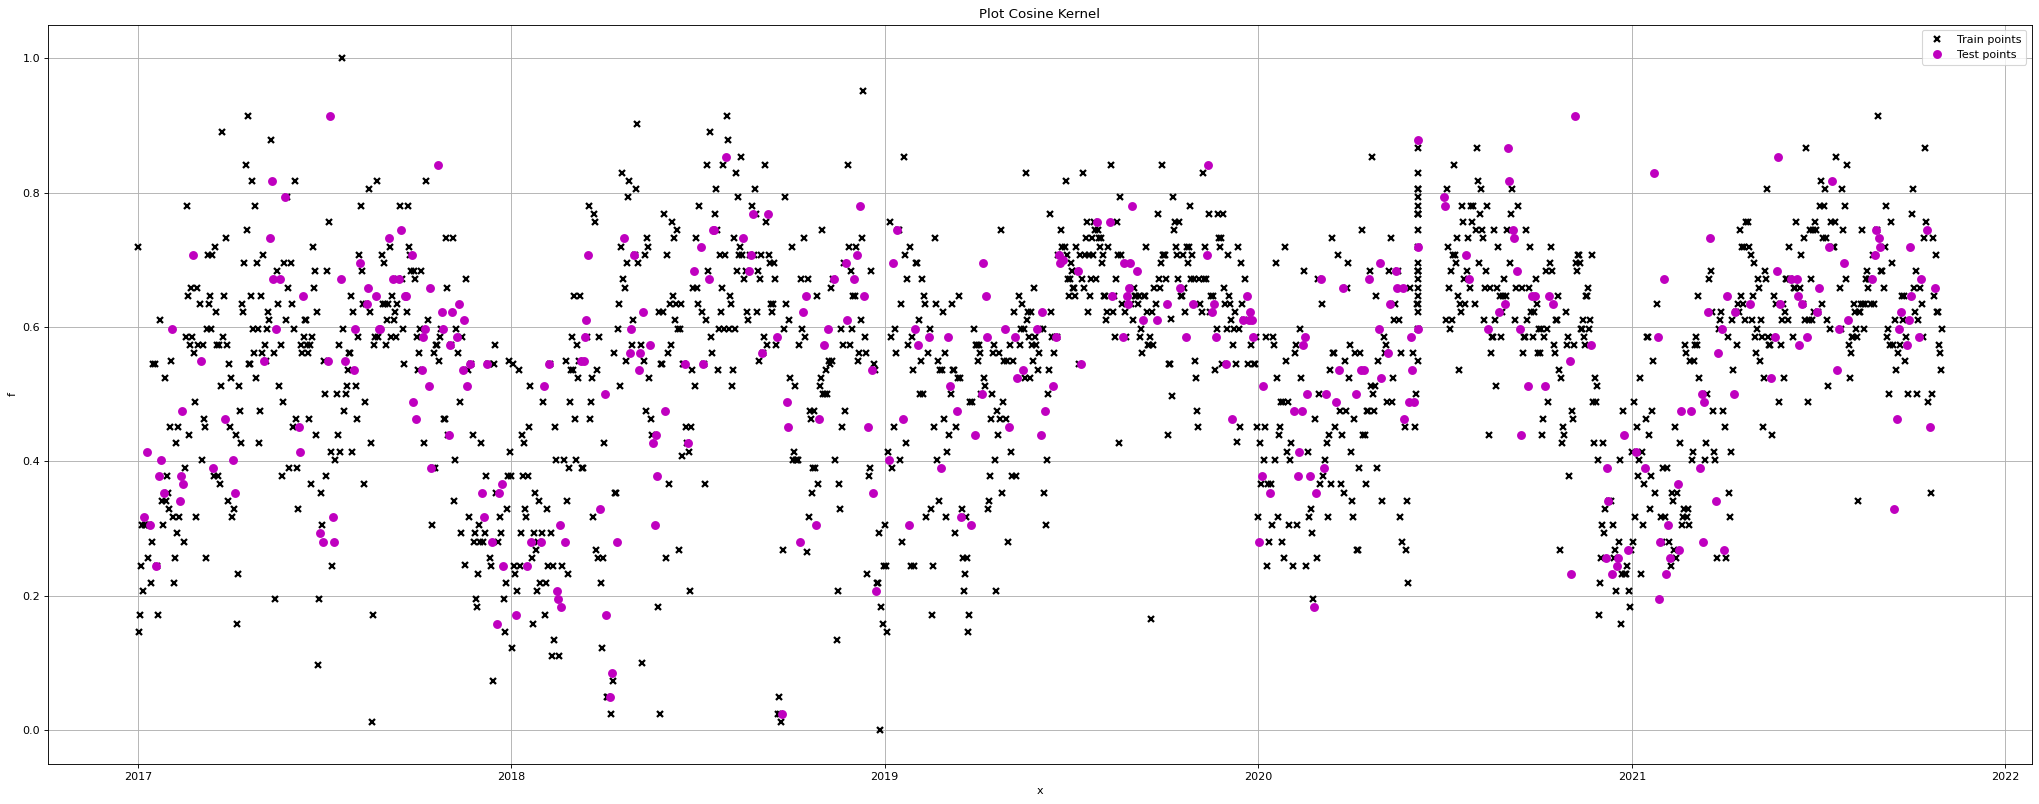

In [52]:
import matplotlib.pyplot as plt
# Plot observations
plt.figure(figsize=(32, 12), dpi=80)
plt.plot(np.array(DKI1['Tanggal'].loc[X_train.flatten()]).reshape(-1,1), y_train, "kx", mew=2, label='Train points')
plt.plot(np.array(DKI1['Tanggal'].loc[X_test.flatten()]).reshape(-1,1), y_test, "mo", mew=2, label='Test points')

# Annotate plot
plt.title('Plot Cosine Kernel')
plt.xlabel("x"), plt.ylabel("f")
plt.grid()
plt.legend()